# Renormalization group

Given the quantum Ising Hamiltonian in transverse field on a one-dimensional lattice with nearest neighbor interaction:
$$
\hat{H} = \lambda \sum_{i=1}^{N} \sigma_z^{(i)} + \sum_{i=1}^{N-1} \sigma_x^{(i)} \sigma_x^{(i+1)}
$$

where $ \sigma_x $ and $ \sigma_z $ are the Pauli matrices and $ \lambda $ is the transverse field.

1. Compute the ground state energy as a function of the transverse field $ \lambda $ by means of the real-space RG algorithm.
2. Compute the ground state energy as a function of $ \lambda $ by means of the INFINITE DMRG algorithm.
3. Compare the results between them and with the mean field solution.

**Import zone**

In [1]:
import real_space_rg as rsrg
import infinite_dmrg as idmrg

import numpy as np
import matplotlib.pyplot as plt

**Real Space Renormalization Group**

In [2]:
# Parameters
N = 1
l = 1
threshold = 1e-10
max_iter = 50
d_eff = 2**N

gs_energy_density, gs_energy, gs, dims = rsrg.real_space_rg(N, l, threshold, d_eff, max_iter, verb=True)

Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Convergence achieved at iteration 45
Reached N = 2*1 x 2**45 = 70368744177664 with precision: delta = 2.6623592219721104e-11


In [3]:
# Parameters
N = 3
l = 1
threshold = 1e-15
max_iter = 70
d_eff = 2**N

gs_energy_density, gs_energy, gs, dims = rsrg.real_space_rg(N, l, threshold, d_eff, max_iter, verb=True)

Starting iteration 0 ...
Starting iteration 10 ...
Convergence achieved at iteration 15
Reached N = 2*3 x 2**15 = 196608 with precision: delta = 2.220446049250313e-16


In [4]:
# Parameters
N = 2
l_values = np.linspace(0, 4, 30)
threshold = 1e-15
max_iter = 10

gs_energy_densities, gs_energies, gs_s, dims = rsrg.update_hamiltonian(N, l_values, threshold, max_iter)

Analysis with N=1024...
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.00049589327513333
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.00047899401314643875
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.00045101154234483687
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.0004036931263471377
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.00033573741467951557
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.00024390472400370733
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 0.0001243351475037624
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 6.23881635242185e-09
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 1.3204992654891612e-12
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 3.650302282665052e-11
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 3.7274627828765006e-11
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 1.908562197172614e-11
Reached N = 2*2 x 2**9 = 2048 with precision: delta = 1.15771

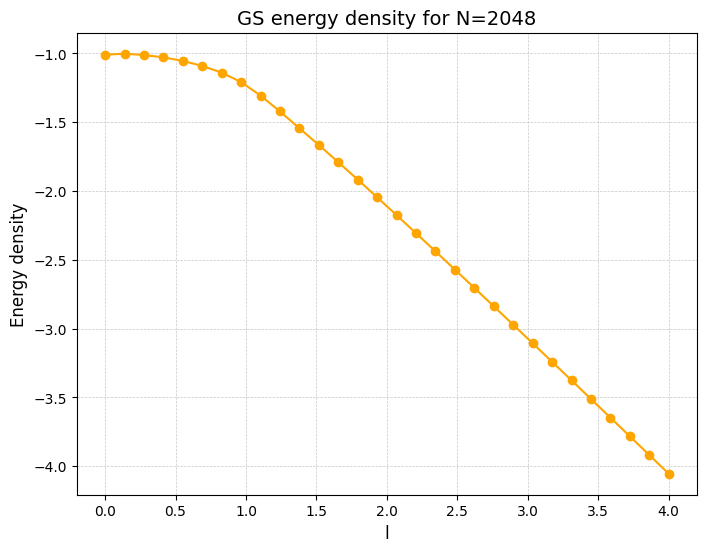

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(l_values, gs_energy_densities.values(), marker='o', linestyle='-', color='orange')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel("l", fontsize=12)
plt.ylabel("Energy density", fontsize=12)
plt.title(f"GS energy density for N={list(dims.values())[0]}", fontsize=14)
plt.show()

**Infinite DMRG**

In [8]:
l = 0
m_0 = 1
m_max = 1
threshold = 1e-20
max_iter = 127

# Test the dmrg function
energy_density, E_ground, psi_ground, dims = idmrg.infinite_dmrg(l, m_0, m_max, threshold, max_iter, verb=True)

# Print the result
print(f"Ground state energy per site: {energy_density}")

Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Starting iteration 50 ...
Starting iteration 60 ...
Starting iteration 70 ...
Starting iteration 80 ...
Starting iteration 90 ...
Starting iteration 100 ...
Starting iteration 110 ...
Starting iteration 120 ...
Reached N = 256 with precision: delta = 3.075787401574104e-05
Ground state energy per site: -0.9960937500000024


In [9]:
l = 0
m_0 = 7
m_max = 1
threshold = 1e-20
max_iter = 121

# Test the dmrg function
energy_density, E_ground, psi_ground, dims = idmrg.infinite_dmrg(l, m_0, m_max, threshold, max_iter, verb=True)

# Print the result
print(f"Ground state energy per site: {energy_density}")

Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Starting iteration 50 ...
Starting iteration 60 ...
Starting iteration 70 ...
Starting iteration 80 ...
Starting iteration 90 ...
Starting iteration 100 ...
Starting iteration 110 ...
Starting iteration 120 ...
Reached N = 256 with precision: delta = 3.075787401585206e-05
Ground state energy per site: -0.9960937500000002


In [10]:
l_values = np.linspace(0, 4, 30)
m_0 = 2
m_max = 1
threshold = 1e-20
max_iter = 128

gs_energy_densities, gs_energies, gs_s, dims = idmrg.update_hamiltonian(l_values, m_0, m_max, threshold, max_iter)

Analysis with N=260...
Reached N = 260 with precision: delta = 2.9815146093570277e-05
Reached N = 260 with precision: delta = 2.9532889191052902e-05
Reached N = 260 with precision: delta = 2.871962407047235e-05
Reached N = 260 with precision: delta = 2.764211313643905e-05
Reached N = 260 with precision: delta = 2.7305686679524044e-05
Reached N = 260 with precision: delta = 3.312742901373511e-05
Reached N = 260 with precision: delta = 6.668260151498906e-05
Reached N = 260 with precision: delta = 1.0178509014746595e-05
Reached N = 260 with precision: delta = 8.188008902232369e-06
Reached N = 260 with precision: delta = 6.931020382516806e-06
Reached N = 260 with precision: delta = 6.044315912445697e-06
Reached N = 260 with precision: delta = 5.3764199423600445e-06
Reached N = 260 with precision: delta = 4.851140859685188e-06
Reached N = 260 with precision: delta = 4.425114602746305e-06
Reached N = 260 with precision: delta = 4.071484935419534e-06
Reached N = 260 with precision: delta = 3.

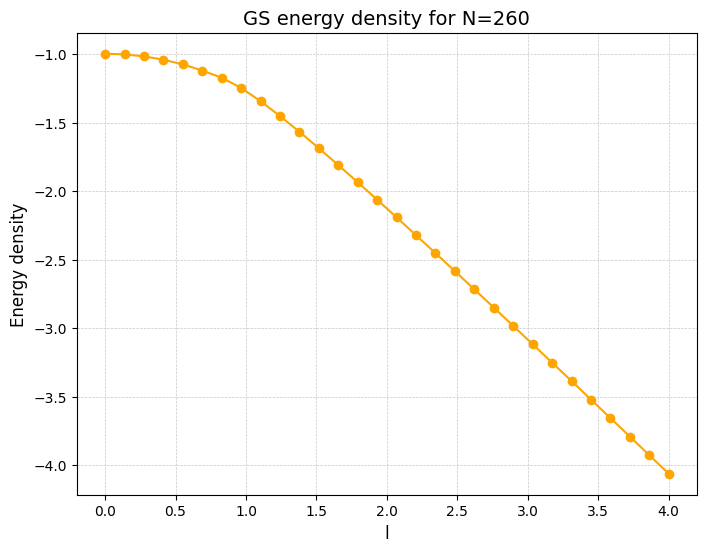

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(l_values, gs_energy_densities.values(), marker='o', linestyle='-', color='orange')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel("l", fontsize=12)
plt.ylabel("Energy density", fontsize=12)
plt.title(f"GS energy density for N={list(dims.values())[0]}", fontsize=14)
plt.show()

**System size for convergence**

In [15]:
# Parameters
N = 2
l_values = np.linspace(0, 4, 30)
threshold = 1e-5
max_iter = 100

gs_energy_densities, gs_energies, gs_s, dims1 = rsrg.update_hamiltonian(N, l_values, threshold, max_iter)

Analysis with N=1267650600228229401496703205376...
Convergence achieved at iteration 15
Reached N = 2*2 x 2**15 = 131072 with precision: delta = 7.9890682869177e-06
Convergence achieved at iteration 15
Reached N = 2*2 x 2**15 = 131072 with precision: delta = 7.487079624723947e-06
Convergence achieved at iteration 15
Reached N = 2*2 x 2**15 = 131072 with precision: delta = 7.047995282061237e-06
Convergence achieved at iteration 15
Reached N = 2*2 x 2**15 = 131072 with precision: delta = 6.2900765736007e-06
Convergence achieved at iteration 15
Reached N = 2*2 x 2**15 = 131072 with precision: delta = 5.241720024473651e-06
Convergence achieved at iteration 14
Reached N = 2*2 x 2**14 = 65536 with precision: delta = 7.5501147820400405e-06
Convergence achieved at iteration 13
Reached N = 2*2 x 2**13 = 32768 with precision: delta = 7.736657983592465e-06
Convergence achieved at iteration 7
Reached N = 2*2 x 2**7 = 512 with precision: delta = 3.4428942141673247e-08
Convergence achieved at iterat

In [16]:
l_values = np.linspace(0, 4, 30)
m_0 = 2
m_max = 1
threshold = 1e-5
max_iter = 1000

gs_energy_densities, gs_energies, gs_s, dims2 = idmrg.update_hamiltonian(l_values, m_0, m_max, threshold, max_iter)

Analysis with N=2004...
Converged after 223 iterations.
Reached N = 450 with precision: delta = 9.92063492011308e-06
Converged after 222 iterations.
Reached N = 448 with precision: delta = 9.914963189361359e-06
Converged after 218 iterations.
Reached N = 440 with precision: delta = 9.998355699591954e-06
Converged after 214 iterations.
Reached N = 432 with precision: delta = 9.981874190989615e-06
Converged after 214 iterations.
Reached N = 432 with precision: delta = 9.929215011528214e-06
Converged after 234 iterations.
Reached N = 472 with precision: delta = 9.94233209694606e-06
Converged after 338 iterations.
Reached N = 680 with precision: delta = 9.98717202937982e-06
Converged after 130 iterations.
Reached N = 264 with precision: delta = 9.871246602344286e-06
Converged after 116 iterations.
Reached N = 236 with precision: delta = 9.945886516149471e-06
Converged after 107 iterations.
Reached N = 218 with precision: delta = 9.873701305229687e-06
Converged after 100 iterations.
Reached

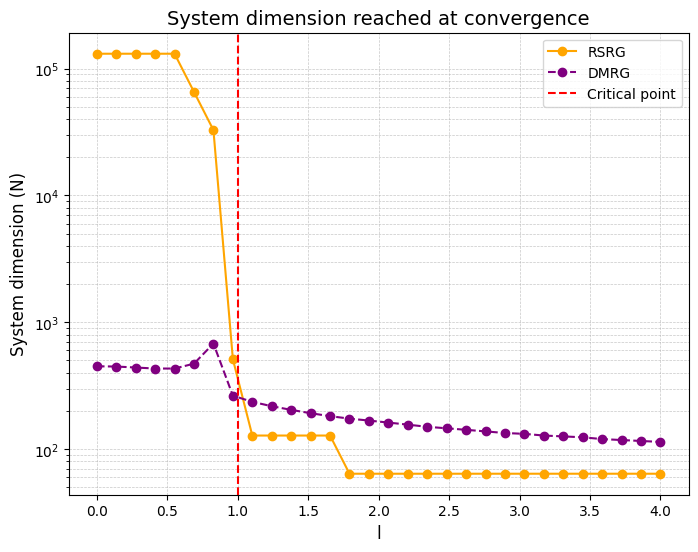

In [30]:
plt.figure(figsize=(8, 6))  # Set the figure size

plt.plot(l_values, list(dims1.values()), label='RSRG', marker='o', linestyle='-', color='orange')
plt.plot(l_values, list(dims2.values()), label='DMRG', marker='o', linestyle='--', color='purple')
plt.axvline(x=1, label='Critical point', linestyle='--', color='red')
plt.yscale('log')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('l', fontsize=12)
plt.ylabel('System dimension (N)', fontsize=12)
plt.title('System dimension reached at convergence', fontsize=14)
plt.legend(fontsize=10, loc='best')
plt.show()

**Cfr with mean field**

In [2]:
from utils import mean_field

In [6]:
l_values = np.linspace(0, 4, 30)
mean_field_dict = mean_field(l_values)

Analysis with N=1024...
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.001011419954390691
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.0009586342795258052
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.0009106111925580862
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.0008411841100328665
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.0007548456879031828
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.0006538075269184596
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.000538373181606655
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.00040746304750616247
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 0.0002577184889340778
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 6.0951568318978744e-05
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 1.7195032175898461e-07
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 3.47507200793018e-08
Reached N = 2*1 x 2**9 = 1024 with precision: delta = 1.47721059

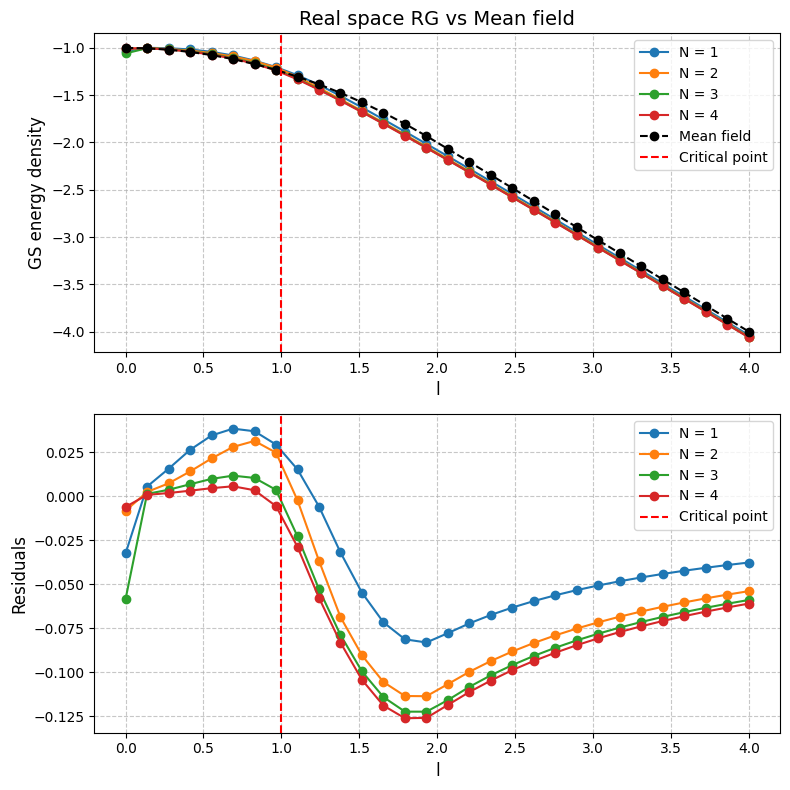

In [12]:
N_vals = [1, 2, 3, 4]
l_values = np.linspace(0, 4, 30)
threshold = 1e-15
max_iter = 10

# Create subplots: one for energy densities and one for residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# First plot: Ground state energy densities
for N in N_vals:
  gs_energy_densities, _, _, dims = rsrg.update_hamiltonian(N, l_values, threshold, max_iter)
  
  # Extract y_values and residuals
  y_values = [gs_energy_densities[(list(dims.values())[0], l)] for l in l_values]
  residuals = [gs_energy_densities[(list(dims.values())[0], l)] - mean_field_dict[l] for l in l_values]
  
  # Plot energy densities
  ax1.plot(l_values, y_values, label=f'N = {N}', marker='o')
  
  # Plot residuals
  ax2.plot(l_values, residuals, label=f'N = {N}', marker='o')

# Add the mean field to the first plot
ax1.plot(l_values, list(mean_field_dict.values()), label='Mean field', marker='o', linestyle='--', color='k')
ax1.axvline(x=1, color='red', linestyle='--', label='Critical point')
ax2.axvline(x=1, color='red', linestyle='--', label='Critical point')

# Customize the first plot
ax1.set_ylabel('GS energy density', fontsize=12)
ax1.set_xlabel('l', fontsize=12)
ax1.set_title('Real space RG vs Mean field', fontsize=14)
ax1.legend(fontsize=10, loc='best')
ax1.grid(visible=True, linestyle='--', alpha=0.7)

# Customize the second plot
ax2.set_xlabel('l', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.legend(fontsize=10, loc='best')
ax2.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Analysis with N=202...
Reached N = 202 with precision: delta = 4.9504950493384214e-05
Reached N = 202 with precision: delta = 4.903691055890835e-05
Reached N = 202 with precision: delta = 4.7706852728701676e-05
Reached N = 202 with precision: delta = 4.595925924477662e-05
Reached N = 202 with precision: delta = 4.550359449218e-05
Reached N = 202 with precision: delta = 5.4842521056031046e-05
Reached N = 202 with precision: delta = 0.00010923210473068323
Reached N = 202 with precision: delta = 1.697566021374719e-05
Reached N = 202 with precision: delta = 1.3635080535756572e-05
Reached N = 202 with precision: delta = 1.1531545725418368e-05
Reached N = 202 with precision: delta = 1.0050515943271776e-05
Reached N = 202 with precision: delta = 8.936473496534703e-06
Reached N = 202 with precision: delta = 8.061201397957518e-06
Reached N = 202 with precision: delta = 7.351858934079303e-06
Reached N = 202 with precision: delta = 6.7634032627772456e-06
Reached N = 202 with precision: delta = 6.

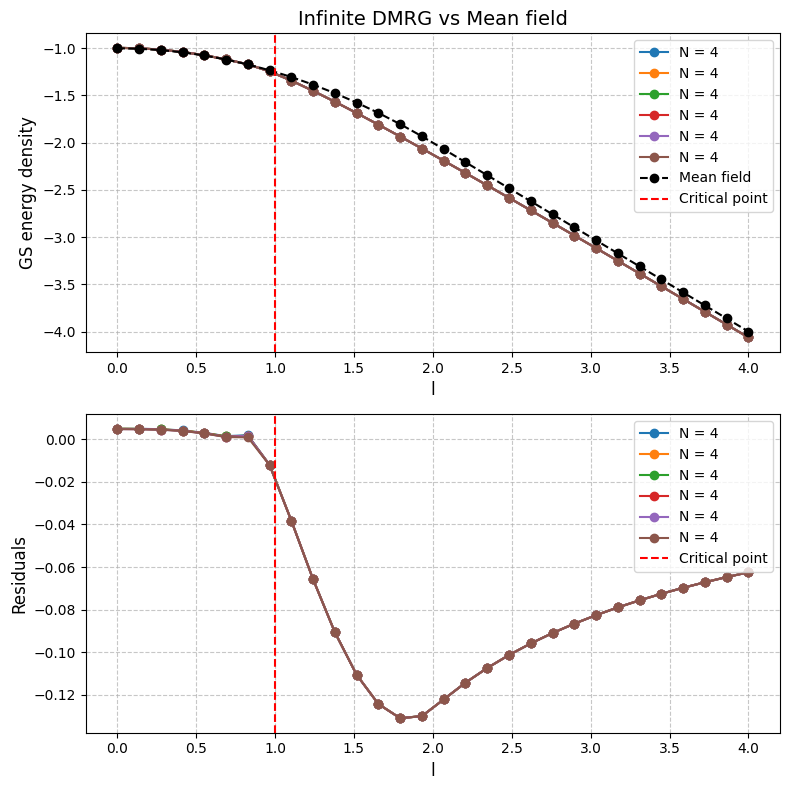

In [13]:
m_0_vals = [1, 2, 3, 4, 5, 6]
m_max = 1
l_values = np.linspace(0, 4, 30)
threshold = 1e-15
max_iter = 100

# Create subplots: one for energy densities and one for residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# First plot: Ground state energy densities
for m_0 in m_0_vals:
  gs_energy_densities, _, _, dims = idmrg.update_hamiltonian(l_values, m_0, m_max, threshold, max_iter)
  
  # Extract y_values and residuals
  y_values = [gs_energy_densities[(list(dims.values())[0], l)] for l in l_values]
  residuals = [gs_energy_densities[(list(dims.values())[0], l)] - mean_field_dict[l] for l in l_values]
  
  # Plot energy densities
  ax1.plot(l_values, y_values, label=f'm_0 = {m_0}', marker='o')
  
  # Plot residuals
  ax2.plot(l_values, residuals, label=f'm_0 = {m_0}', marker='o')

# Add the mean field to the first plot
ax1.plot(l_values, list(mean_field_dict.values()), label='Mean field', marker='o', linestyle='--', color='k')
ax1.axvline(x=1, color='red', linestyle='--', label='Critical point')
ax2.axvline(x=1, color='red', linestyle='--', label='Critical point')

# Customize the first plot
ax1.set_ylabel('GS energy density', fontsize=12)
ax1.set_xlabel('l', fontsize=12)
ax1.set_title('Infinite DMRG vs Mean field', fontsize=14)
ax1.legend(fontsize=10, loc='best')
ax1.grid(visible=True, linestyle='--', alpha=0.7)

# Customize the second plot
ax2.set_xlabel('l', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.legend(fontsize=10, loc='best')
ax2.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
